In [1]:
# blanket import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
# setting up paths for data
happy_cs = "Output/happy_comb-data.csv"

In [3]:
happy_df = pd.read_csv(happy_cs)
happy_df

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
0,1,Finland,7.821,0.775,1858.00,18742.0,10.65
1,2,Denmark,7.636,0.777,1932.00,20304.0,10.13
2,3,Iceland,7.557,0.803,1326.00,19300.0,9.21
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
4,5,Netherlands,7.415,0.787,1662.00,19690.0,9.67
...,...,...,...,...,...,...,...
93,136,India,3.777,0.471,2517.02,1314.0,5.61
94,137,Zambia,3.760,0.306,2965.47,1045.0,4.46
95,138,Malawi,3.750,0.388,2795.87,733.0,4.08
96,139,Tanzania,3.702,0.425,3032.85,992.0,12.04


In [16]:
# Linear Regression Function
plt.style.use("ggplot")

def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Country Happiness Score vs. {y_label}', fontsize = 12)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    correlation = st.pearsonr(x_axis_lreg, y_axis_lreg)
    print(f'The correlation between Happiness and {y_label} is {(round(correlation[0],2))}.')
    
#     print(f'The r-square value is: {round(rvalue**2,2)}.')

## Happiness by average income
#### Q: Are countries with higher average incomes happier?

The correlation between Happiness and Average Income is 0.84.


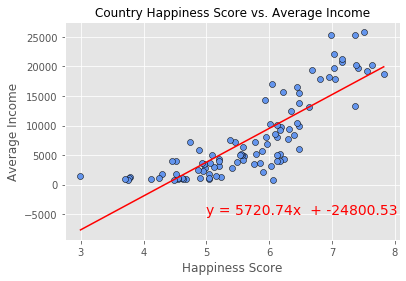

In [17]:
linear_regression(happy_df['Happiness Score'], happy_df['Average Income ($)'], 'Happiness Score', 'Average Income', 5, -5000)

In [18]:
avg_income = happy_df.sort_values('Average Income ($)', ascending = False)
avg_income.head()

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
13,16,United States of America,6.977,0.628,2827.62,25332.0,9.97
6,8,Norway,7.365,0.786,1373.33,25272.0,7.14
12,15,Canada,7.025,0.783,2028.04,22042.0,8.81
9,12,Australia,7.162,0.772,2843.57,21329.0,10.36


## Happiness by annual sunshine 
#### Q: Does the weather of a country (av sunshine) influence happiness?

The correlation between Happiness and Sunshine Hours per Year is -0.54.


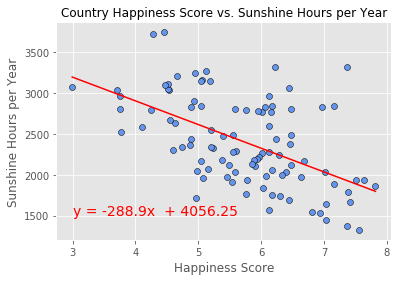

In [25]:
linear_regression(happy_df['Happiness Score'], happy_df['Sunshine Hrs per Year'], 'Happiness Score', 'Sunshine Hours per Year', 3, 1500)

In [26]:
annual_sunshine = happy_df.sort_values('Sunshine Hrs per Year', ascending = False)
annual_sunshine.head()

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
89,124,Namibia,4.459,0.354,3737.50,4023.0,3.15
90,129,Egypt,4.288,0.548,3710.68,1847.0,0.14
29,41,Cyprus,6.221,0.819,3314.10,15663.0,10.80
7,9,Israel,7.364,0.818,3311.00,13271.0,4.38
67,96,Algeria,5.122,0.643,3266.50,2996.0,0.63


## Happiness by life expectancy
#### Q: Are countries with longer life expectancies happier?

The correlation between Happiness and Healthy Life Expectancy is 0.78.


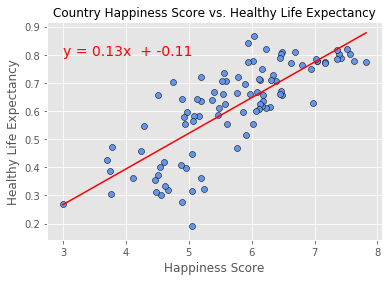

In [27]:
linear_regression(happy_df['Happiness Score'], happy_df['Healthy Life Expectancy'], 'Happiness Score', 'Healthy Life Expectancy', 3, 0.8)

In [28]:
life_expectancy = happy_df.sort_values('Healthy Life Expectancy', ascending = False)
life_expectancy.head()

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
40,54,Japan,6.039,0.866,1837.12,17095.0,10.09
45,59,South Korea,5.935,0.841,2196.65,14316.0,8.45
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
29,41,Cyprus,6.221,0.819,3314.10,15663.0,10.80
7,9,Israel,7.364,0.818,3311.00,13271.0,4.38


## Happiness by alcohol consumption
#### Q: Does Alcohol Influence happiness?

The correlation between Happiness and Alcohol Consumption (L/year) is 0.56.


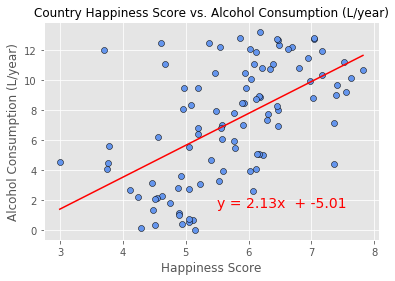

In [30]:
linear_regression(happy_df['Happiness Score'], happy_df['Alcohol Consumption (L/year)'], 'Happiness Score', 'Alcohol Consumption (L/year)', 5.5, 1.5)

In [31]:
alcohol_consumption = happy_df.sort_values('Alcohol Consumption (L/year)', ascending = False)
alcohol_consumption.head()

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
30,42,Latvia,6.180,0.637,1754.0,9727.0,13.19
48,62,Moldova,5.857,0.597,2126.0,3590.0,12.85
11,14,Germany,7.034,0.776,1644.0,19730.0,12.79
23,34,Lithuania,6.446,0.659,1691.0,10479.0,12.78
10,13,Ireland,7.041,0.779,1453.0,17938.0,12.75
